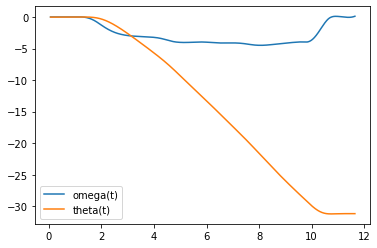

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import signal

#Laste inn fil i CSV-format til n-dimensjonalt NumPy-array
#Eksempel: laste inn CSV-fil med rotasjonsrate-verdier fra Phyphox med 4 kolonner for t, omega_x, omega_y, omega_z
fil=np.loadtxt('data_stol.csv',delimiter=',',skiprows=1)
t=fil[:,0]
omega_z=fil[:,3]
omega_y=fil[:,2]
omega_x=fil[:,1]

#Glatting av funksjoner med Savgol-filter i scipy-bibliotek
#Syntaks: filtrerte_data=signal.savgol_filter(raadata,window_length,polyorder)
#Større "window_length" gir glattere kurve
omega_z_filt=signal.savgol_filter(omega_z,301,3) #z-akse
omega_y_filt=signal.savgol_filter(omega_y,301,3) #y-akse 
omega_x_filt=signal.savgol_filter(omega_x,301,3) #x-akse 

#Eulers metode for å lage theta(t) basert på vinkelfart
#Algoritmen:
#theta_(n+1)=theta_n + omega_z*dt


n=len(t) #Lengde på array

#Initierer tomme arrays
theta=np.zeros(n)


#Eulers metode for å finne theta(t)
for i in range(0,n-1):
           theta[i+1]=theta[i]+omega_z_filt[i]*(t[i+1]-t[i])


#Genererer grafer for omega(t), theta(t)
grafer=plt.subplot()
plott1=plt.plot(t,omega_z_filt) #omega(t)
plott2=plt.plot(t,theta) #theta(t)

grafer.legend(['omega(t)','theta(t)'])



In [14]:
scipy.integrate.simps(a_z_filt, t, even='avg')

-0.16956303511134568